<a href="https://www.kaggle.com/code/caruazu/atividade-de-interpolacao?scriptVersionId=119499370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Atividade de Interpolação

Apesar de não ser o método mais indicado para essa situação, necessitava criar um exemplo para meu professor de cálculo numérico.

## Análise exploratória

In [1]:
import pandas as pd

clima_nordeste = pd.read_csv("../input/hourly-weather-surface-brazil-southeast-region/northeast.csv")
clima_nordeste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16260936 entries, 0 to 16260935
Data columns (total 27 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   index                                                  int64  
 1   Data                                                   object 
 2   Hora                                                   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  int64  
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       float64
 7   RADIACAO GLOBAL (Kj/m²)                                int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           float64
 9   TEMPERATURA DO PONTO DE ORVALHO (°C)                   float64
 10  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             float64
 

In [2]:
de_alagoas = clima_nordeste["state"]=="AL"
clima_alagoas = clima_nordeste[de_alagoas]
clima_alagoas.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
154176,115536,2003-02-25,00:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154177,115537,2003-02-25,01:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154178,115538,2003-02-25,02:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154179,115539,2003-02-25,03:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154180,115540,2003-02-25,04:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0


In [3]:
clima_alagoas["station"].value_counts()

MACEIO                  159360
PALMEIRA DOS INDIOS     121032
PAO DE ACUCAR           120960
ARAPIRACA               114048
CORURIPE                110880
SAO LUIS DO QUITUNDE    110832
PIRANHAS                 31656
Name: station, dtype: int64

In [4]:
de_maceio = clima_alagoas["station"]=="MACEIO"
clima_maceio = clima_alagoas[de_maceio]
clima_maceio.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
154176,115536,2003-02-25,00:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154177,115537,2003-02-25,01:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154178,115538,2003-02-25,02:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154179,115539,2003-02-25,03:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0
154180,115540,2003-02-25,04:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,AL,MACEIO,A303,-9.551111,-35.770278,80.0


In [5]:
clima_maceio["station_code"].value_counts()

A303    159360
Name: station_code, dtype: int64

In [6]:
del clima_nordeste
del clima_alagoas

## Limpeza

In [7]:
colunas = clima_maceio.columns.values.tolist()
colunas.remove('index')
colunas.remove('Data')
colunas.remove('Hora')
colunas.remove('TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)')

clima_maceio = clima_maceio.drop(colunas,axis=1)
clima_maceio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159360 entries, 154176 to 16075179
Data columns (total 4 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   index                                         159360 non-null  int64  
 1   Data                                          159360 non-null  object 
 2   Hora                                          159360 non-null  object 
 3   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  159360 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [8]:
clima_maceio["datahora"] = clima_maceio["Data"].astype(str)+" "+clima_maceio["Hora"].astype(str)
clima_maceio.head()

,index,Data,Hora,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",datahora
154176,115536,2003-02-25,00:00,-9999.0,2003-02-25 00:00
154177,115537,2003-02-25,01:00,-9999.0,2003-02-25 01:00
154178,115538,2003-02-25,02:00,-9999.0,2003-02-25 02:00
154179,115539,2003-02-25,03:00,-9999.0,2003-02-25 03:00
154180,115540,2003-02-25,04:00,-9999.0,2003-02-25 04:00


In [9]:
clima_maceio["tempo"] = pd.to_datetime(clima_maceio["datahora"],format="%Y-%m-%d %H:%M")
clima_maceio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159360 entries, 154176 to 16075179
Data columns (total 6 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   index                                         159360 non-null  int64         
 1   Data                                          159360 non-null  object        
 2   Hora                                          159360 non-null  object        
 3   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  159360 non-null  float64       
 4   datahora                                      159360 non-null  object        
 5   tempo                                         159360 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.5+ MB


In [10]:
clima_maceio.set_index("tempo",inplace=True)
clima_maceio

,index,Data,Hora,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",datahora
tempo,,,,,
2003-02-25 00:00:00,115536,2003-02-25,00:00,-9999.0,2003-02-25 00:00
2003-02-25 01:00:00,115537,2003-02-25,01:00,-9999.0,2003-02-25 01:00
2003-02-25 02:00:00,115538,2003-02-25,02:00,-9999.0,2003-02-25 02:00
2003-02-25 03:00:00,115539,2003-02-25,03:00,-9999.0,2003-02-25 03:00
2003-02-25 04:00:00,115540,2003-02-25,04:00,-9999.0,2003-02-25 04:00
...,...,...,...,...,...
2021-04-30 19:00:00,167035,2021-04-30,19:00,28.6,2021-04-30 19:00
2021-04-30 20:00:00,167036,2021-04-30,20:00,27.1,2021-04-30 20:00
2021-04-30 21:00:00,167037,2021-04-30,21:00,26.6,2021-04-30 21:00


In [11]:
clima_maceio = clima_maceio.drop(["index","Data","Hora","datahora"],axis=1)
clima_maceio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159360 entries, 2003-02-25 00:00:00 to 2021-04-30 23:00:00
Data columns (total 1 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  159360 non-null  float64
dtypes: float64(1)
memory usage: 2.4 MB


In [12]:
clima_maceio = clima_maceio.rename(columns={'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)':'temperatura'})
clima_maceio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159360 entries, 2003-02-25 00:00:00 to 2021-04-30 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperatura  159360 non-null  float64
dtypes: float64(1)
memory usage: 2.4 MB


In [13]:
import numpy as np
clima_maceio.loc[clima_maceio['temperatura'] < -999, 'temperatura'] = np.nan
clima_maceio.head()

,temperatura
tempo,
2003-02-25 00:00:00,NaN
2003-02-25 01:00:00,NaN
2003-02-25 02:00:00,NaN
2003-02-25 03:00:00,NaN
2003-02-25 04:00:00,NaN


In [14]:
clima_maceio['temperatura'].value_counts()

23.6    2081
23.9    2053
23.8    2047
24.2    2043
23.7    2037
        ... 
39.8       1
37.9       1
38.1       1
17.1       1
17.7       1
Name: temperatura, Length: 211, dtype: int64

<AxesSubplot:>

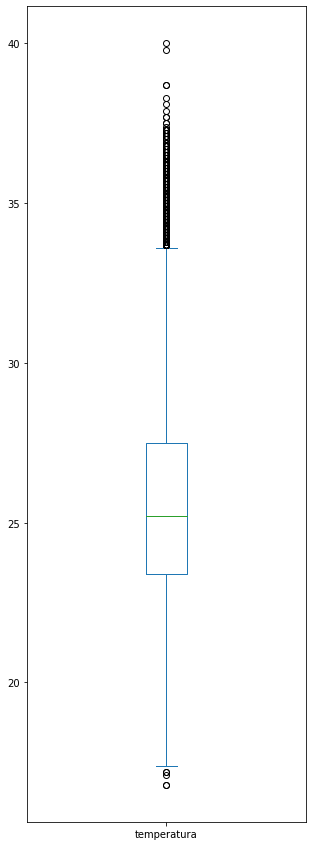

In [15]:
boxplot1 = clima_maceio[clima_maceio.notna()]
boxplot1["temperatura"].plot.box(figsize=(5,15))

## interpolação

### Escala diária

Variação de temperatura devido à rotação da terra

,temperatura
tempo,
2010-01-21 00:00:00,24.5
2010-01-21 01:00:00,24.4
2010-01-21 02:00:00,24.1
2010-01-21 03:00:00,23.9
2010-01-21 04:00:00,23.6


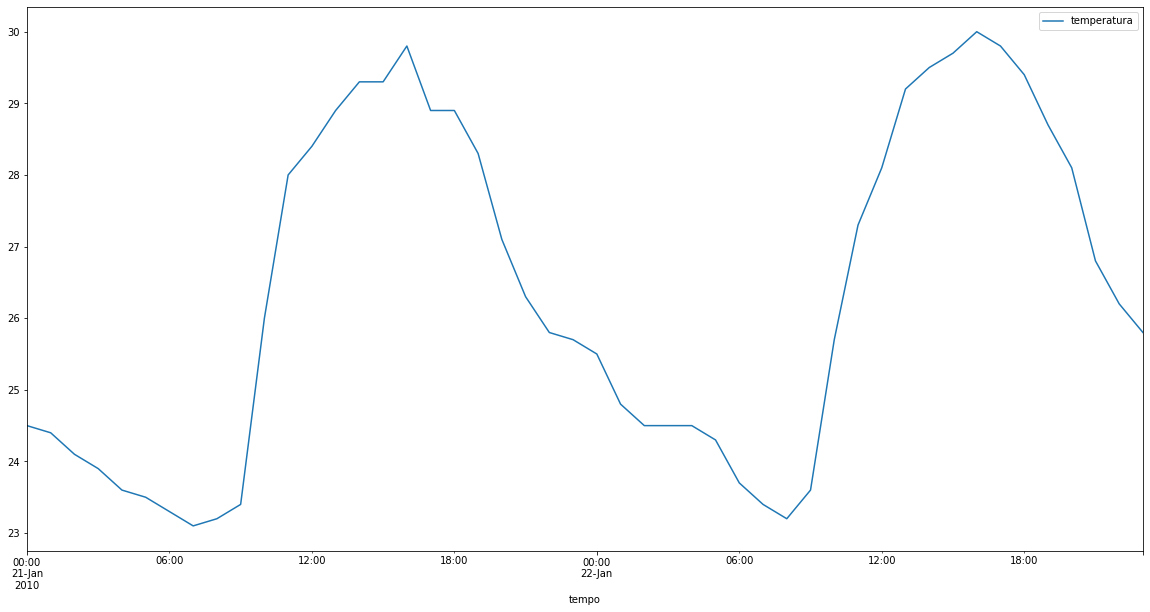

In [16]:
linear1_antes = clima_maceio["2010-01-21":"2010-01-22"]
linear1_antes.plot.line(y="temperatura",figsize=(20,10))
linear1_antes.head()

,temperatura
tempo,
2010-01-21 00:00:00,24.500000
2010-01-21 00:15:00,24.499294
2010-01-21 00:30:00,24.482392
2010-01-21 00:45:00,24.449294
2010-01-21 01:00:00,24.400000


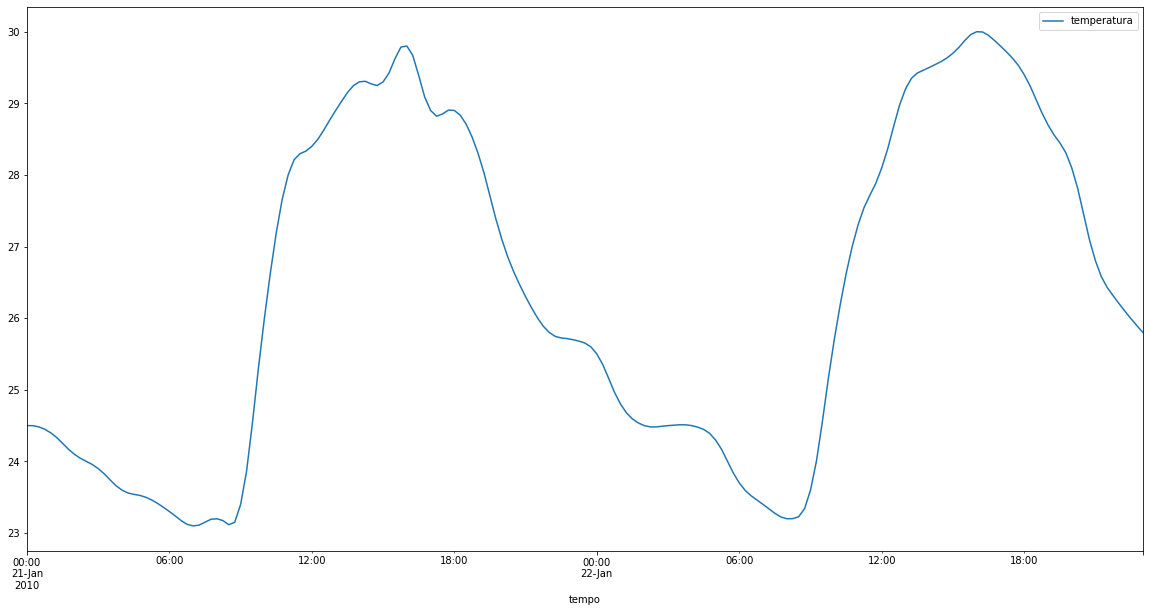

In [17]:
linear1_depois = clima_maceio["2010-01-21":"2010-01-22"]
linear1_depois = linear1_depois.asfreq(freq='15min')
linear1_depois = linear1_depois.interpolate(method="polynomial",order=2)
linear1_depois.plot.line(y="temperatura",figsize=(20,10))
linear1_depois.head()

### Escala anual

Variação de temperatura devido à translação da terra ao redor do sol

,temperatura
tempo,
2016-01-01 00:00:00,25.3
2016-01-01 01:00:00,24.7
2016-01-01 02:00:00,24.2
2016-01-01 03:00:00,23.7
2016-01-01 04:00:00,23.4


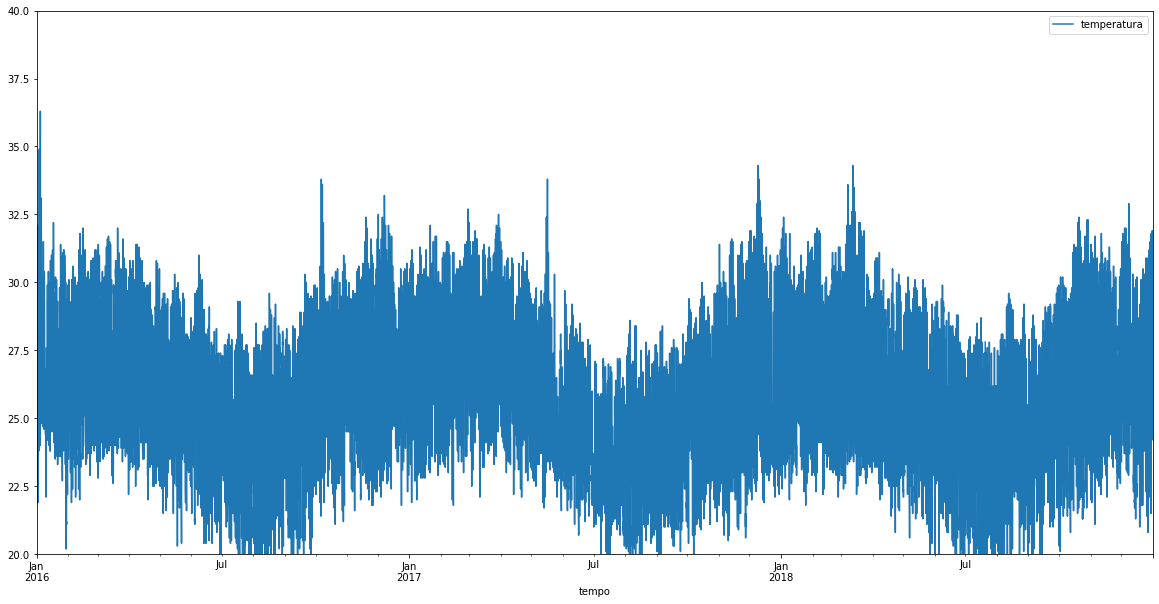

In [18]:
anual = clima_maceio["2016":"2018"]
anual.plot.line(y="temperatura",ylim=(20,40),figsize=(20,10))
anual.head()

,temperatura
tempo,
2016-01-01,27.363542
2016-01-09,26.331771
2016-01-17,26.383333
2016-01-25,26.019271
2016-02-02,26.177083


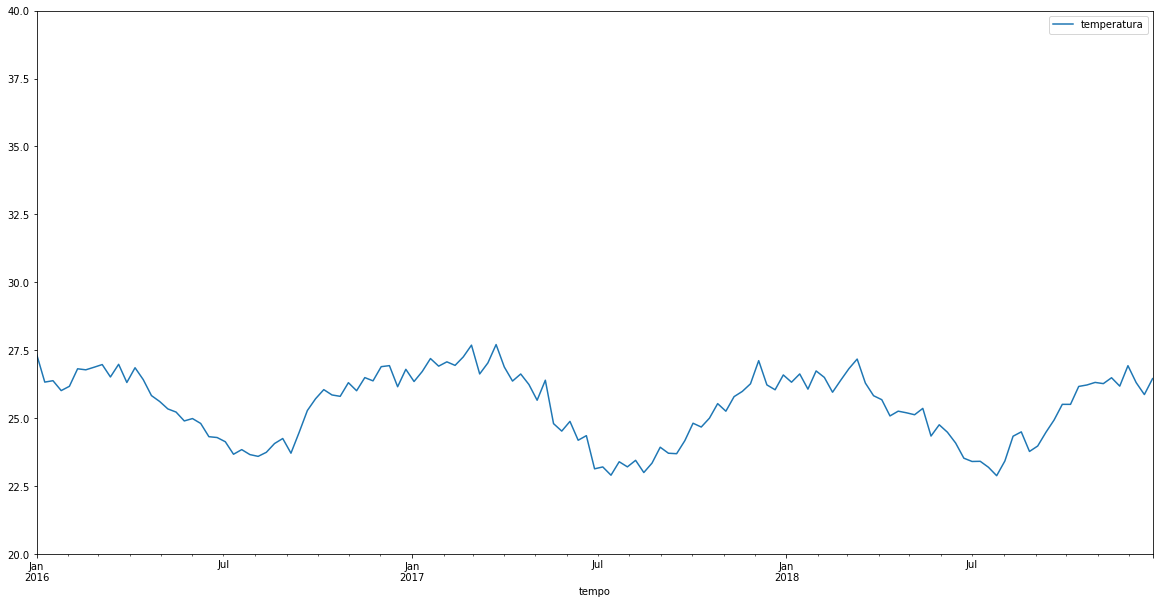

In [19]:
anual = anual.resample("8D").mean()
anual.plot.line(y="temperatura",ylim=(20,40),figsize=(20,10))
anual.head()

,temperatura
tempo,
2016-01-01,27.363542
2016-01-02,27.159804
2016-01-03,26.977428
2016-01-04,26.816414
2016-01-05,26.676762


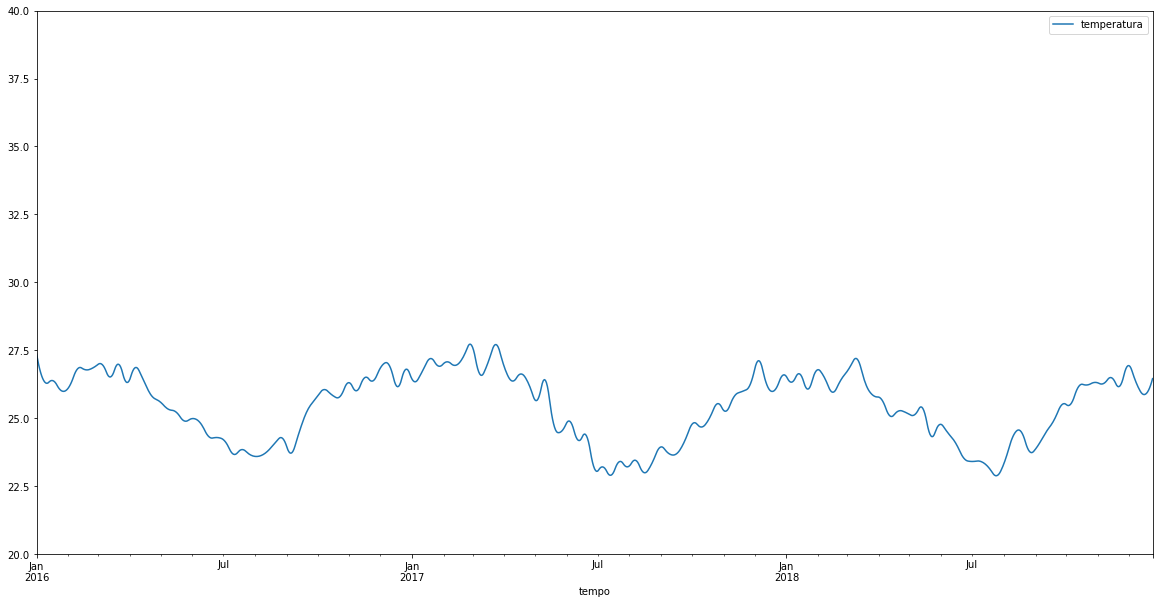

In [20]:
anual = anual.asfreq(freq='1D')
anual= anual.interpolate(method="polynomial",order=2)
anual.plot.line(y="temperatura",ylim=(20,40),figsize=(20,10))
anual.head()

### Trecho sem muita informação

<AxesSubplot:xlabel='tempo'>

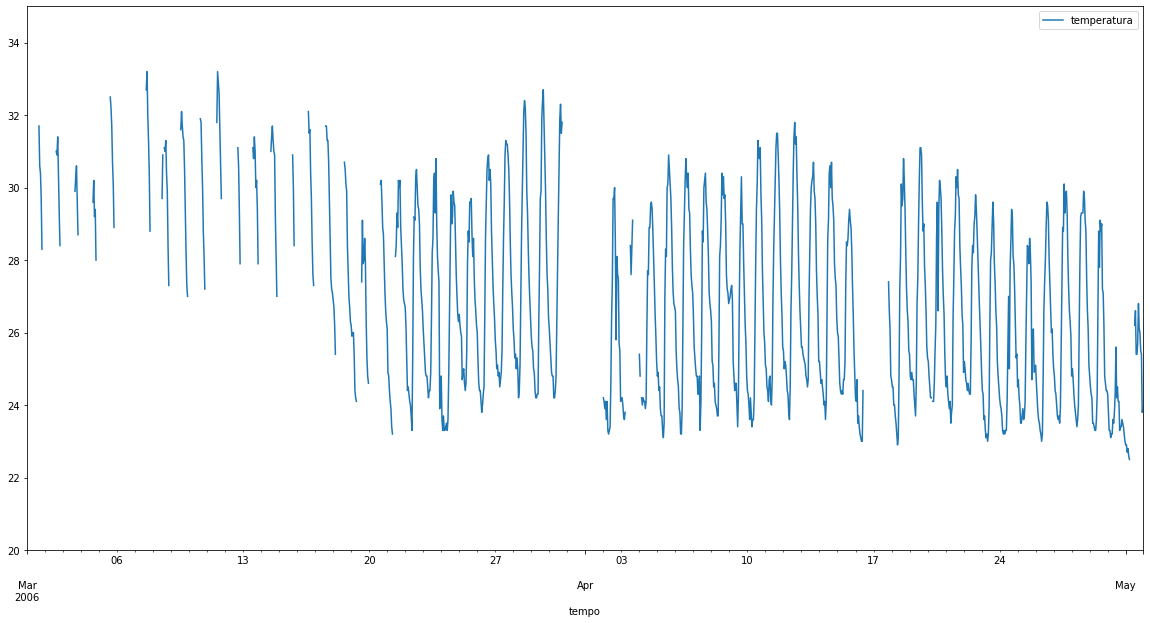

In [21]:
linear2_antes = clima_maceio["2006-03-01":"2006-05-01"]
linear2_antes.plot.line(y="temperatura",figsize=(20,10),ylim=(20,35))

<AxesSubplot:xlabel='tempo'>

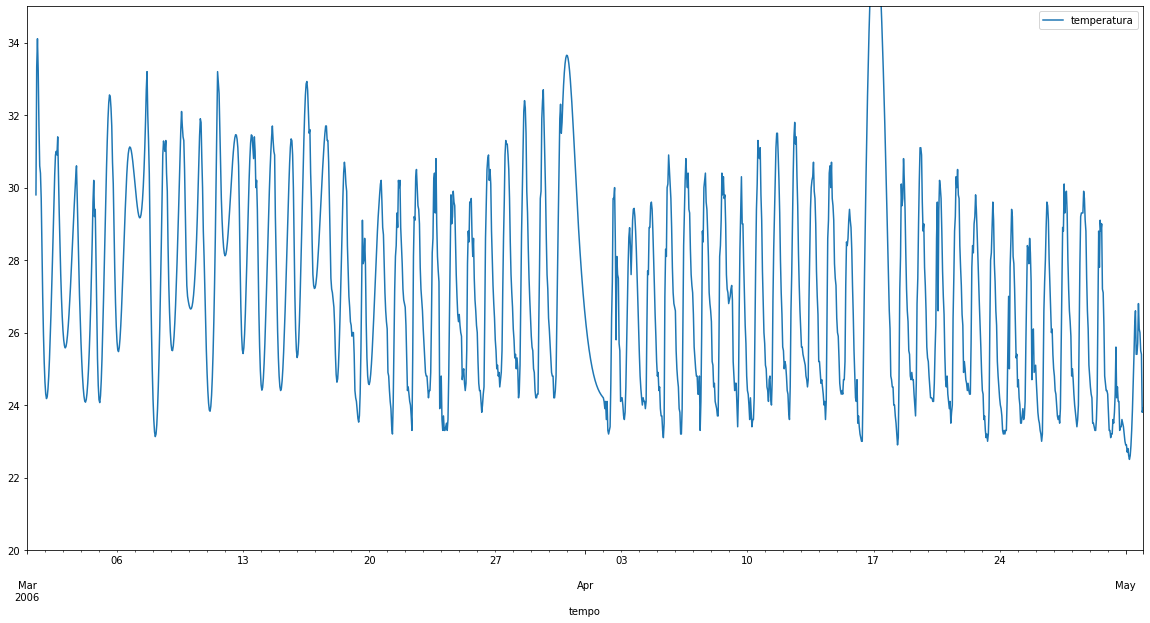

In [22]:
linear2_depois = clima_maceio["2006-03-01":"2006-05-01"]
linear2_depois = linear2_depois.interpolate(method="polynomial",order=3)
linear2_depois.plot.line(y="temperatura",figsize=(20,10),ylim=(20,35))